In [ ]:
import pandas as pd
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np

In [ ]:
column_names = ['User_id', 'Movie_id', 'Ratings', 'Timestamp'] 
df= pd.read_csv('/content/drive/MyDrive/Recommend.csv', names =column_names)
df.head()

In [ ]:
df.shape

In [ ]:
df.nunique()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_id    100000 non-null  int64  
 1   Movie_id   100000 non-null  int64  
 2   Ratings    100000 non-null  float64
 3   Timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
df.describe()

In [ ]:
df.boxplot(figsize=(10,15))
plt.show()

In [ ]:
q1= df['Movie_id'].quantile(.25)
q3= df['Movie_id'].quantile(.75)
IQR= q3-q1
df['Movie_id']= np.clip(df['Movie_id'], q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1= df['Ratings'].quantile(.25)
q3= df['Ratings'].quantile(.75)
IQR= q3-q1
df['Ratings']= np.clip(df['Ratings'], q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
df.corr()

In [ ]:
sns.regplot(x="Movie_id", y="Ratings", data=df)

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
print('Movie with Highest entries:',df2['Title'].value_counts().index[0])


Movie with Highest entries: Inventing the Abbotts (1997)


In [ ]:
!wget https://www.dropbox.com/s/djvmtegw4mdrsj3/Movie_Id_Titles.csv

In [ ]:
movies= pd.read_csv('/content/drive/MyDrive/Movie_Id_Titles.csv')
movies.columns= ['Movie_id', 'Title']
movies.head()

,Movie_id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
df2= pd.merge(df, movies, on = 'Movie_id')
df2.head()

,User_id,Movie_id,Ratings,Timestamp,Title
0,196,242,3.0,881250949,Kolya (1996)
1,63,242,3.0,875747190,Kolya (1996)
2,226,242,5.0,883888671,Kolya (1996)
3,154,242,3.0,879138235,Kolya (1996)
4,306,242,5.0,876503793,Kolya (1996)


In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(df2['Title'].value_counts()[:15].index,df2['Title'].value_counts()[:15].values,palette='inferno')
plt.title('Top Movies with Ratings ')
plt.show()

In [ ]:
df2.nunique()

User_id        943
Movie_id      1315
Ratings          5
Timestamp    49282
Title         1305
dtype: int64

group by in pandas is used when we want to compile for each group, how many times

In [ ]:
df2.groupby('Title')['Ratings'].count().sort_values(ascending=False)

Title
Inventing the Abbotts (1997)                  1372
Star Wars (1977)                               583
Contact (1997)                                 509
Fargo (1996)                                   508
Return of the Jedi (1983)                      507
                                              ... 
Marlene Dietrich: Shadow and Light (1996)        1
Very Natural Thing, A (1974)                     1
Cyclo (1995)                                     1
Jupiter's Wife (1994)                            1
Paris Was a Woman (1995)                         1
Name: Ratings, Length: 1305, dtype: int64

In [ ]:
# Is the movie good or bad, average the rating
ratings = pd.DataFrame(df2.groupby('Title')['Ratings'].mean())
ratings['Number of Ratings'] = pd.DataFrame(df2.groupby('Title')['Ratings'].count())
ratings.head()

,Ratings,Number of Ratings
Title,,
'Til There Was You (1997),2.444444,9
101 Dalmatians (1996),2.977064,109
12 Angry Men (1957),4.344000,125
187 (1997),3.085366,41
2 Days in the Valley (1996),3.263441,93


In [ ]:
ratings.to_csv("ratings.csv")

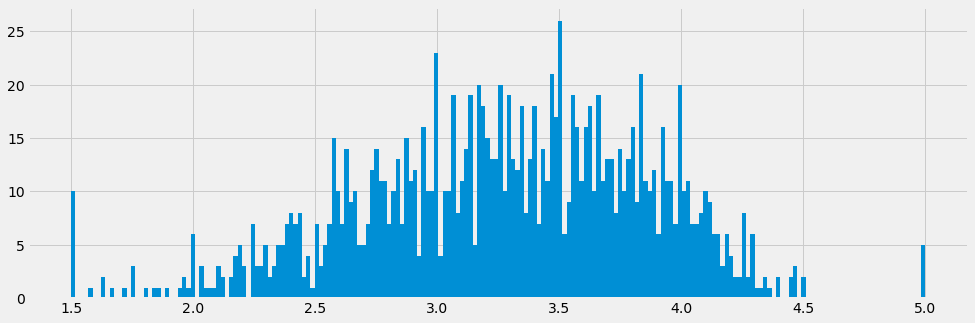

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(ratings['Ratings'], bins =200)
plt.show() 

In [ ]:
pivot_movie = df2.pivot_table(index = 'User_id', columns = 'Title', values = 'Ratings')
pivot_movie.head()  

Title,'Til There Was You (1997),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),A Chef in Love (1996),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),Alien (1979),Alien 3 (1992),Alien: Resurrection (1997),Aliens (1986),...,What Happened Was... (1994),What's Eating Gilbert Grape (1993),What's Love Got to Do with It (1993),When Harry Met Sally... (1989),When We Were Kings (1996),When a Man Loves a Woman (1994),When the Cats Away (Chacun cherche son chat) (1996),While You Were Sleeping (1995),"White Balloon, The (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),"Wizard of Oz, The (1939)",Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
User_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,...,NaN,4.0,NaN,5.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,NaN,NaN,NaN,1.5,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [ ]:
pivot_movie.shape

(943, 1305)

In [ ]:
pivot_movie['Return of the Jedi (1983)']

User_id
1      5.0
2      NaN
3      4.0
4      NaN
5      5.0
      ... 
939    NaN
940    3.0
941    5.0
942    NaN
943    4.0
Name: Return of the Jedi (1983), Length: 943, dtype: float64

In [ ]:
jedi_user_rating = pivot_movie['Return of the Jedi (1983)']
jedi_user_rating.head()

User_id
1    5.0
2    NaN
3    4.0
4    NaN
5    5.0
Name: Return of the Jedi (1983), dtype: float64

In [ ]:
similar_to_jedi = pivot_movie.corrwith(jedi_user_rating)
similar_to_jedi.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Title
'Til There Was You (1997)      1.000000
101 Dalmatians (1996)          0.173282
12 Angry Men (1957)           -0.029505
187 (1997)                     0.104780
2 Days in the Valley (1996)    0.037437
dtype: float64

In [ ]:
Fargo_user_rating = pivot_movie['Fargo (1996)']
Fargo_user_rating.head()

User_id
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

In [ ]:
similar_to_Fargo = pivot_movie.corrwith(Fargo_user_rating)
similar_to_Fargo.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Title
'Til There Was You (1997)      0.245718
101 Dalmatians (1996)         -0.240554
12 Angry Men (1957)            0.114792
187 (1997)                     0.140915
2 Days in the Valley (1996)    0.323109
dtype: float64

In [ ]:
corr_with_Fargo = pd.DataFrame(similar_to_Fargo, columns = ['Correlation'])
corr_with_Fargo.head()

,Correlation
Title,
'Til There Was You (1997),0.245718
101 Dalmatians (1996),-0.240554
12 Angry Men (1957),0.114792
187 (1997),0.140915
2 Days in the Valley (1996),0.323109


In [ ]:
corr_with_Fargo.sort_values('Correlation', ascending = False).head(10)

,Correlation
Title,
Maya Lin: A Strong Clear Vision (1994),1.0
"Smile Like Yours, A (1997)",1.0
Fargo (1996),1.0
King of the Hill (1993),1.0
So Dear to My Heart (1949),1.0
Ed (1996),1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0
"Quiet Room, The (1996)",1.0
"Last Time I Saw Paris, The (1954)",1.0


In [ ]:
corr_with_fargo = corr_with_Fargo.join(ratings['Number of Ratings'])
corr_with_fargo.head()

,Correlation,Number of Ratings
Title,,
'Til There Was You (1997),0.245718,9
101 Dalmatians (1996),-0.240554,109
12 Angry Men (1957),0.114792,125
187 (1997),0.140915,41
2 Days in the Valley (1996),0.323109,93


In [ ]:
corr_with_fargo.sort_values('Correlation' , ascending = False).head(10)

,Correlation,Number of Ratings
Title,,
Maya Lin: A Strong Clear Vision (1994),1.0,4
"Smile Like Yours, A (1997)",1.0,25
Fargo (1996),1.0,508
King of the Hill (1993),1.0,4
So Dear to My Heart (1949),1.0,4
Ed (1996),1.0,6
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3
"Quiet Room, The (1996)",1.0,3
"Last Time I Saw Paris, The (1954)",1.0,3


In [ ]:
corr_with_fargo[corr_with_fargo['Number of Ratings']>200].sort_values('Correlation', ascending = False)

,Correlation,Number of Ratings
Title,,
Fargo (1996),1.000000,508
"People vs. Larry Flynt, The (1996)",0.333821,215
Stand by Me (1986),0.328757,227
Raising Arizona (1987),0.314978,256
Amadeus (1984),0.307253,276
...,...,...
Eraser (1996),-0.064944,206
Evita (1996),-0.085906,259
Aladdin (1992),-0.112329,219
